# USED CAR DATA 

### Investgation Overview
In this investigation, I wanted to look at relationships as well as correlations between some specific variables that could be used in when purchasing a used car.

### Dataset Overview
The data is about transportation (used car) industry.Data were sourced from Kaggle (https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?select=UserCarData.csv). The data contains about 7,906 used cars of different transmission, owner,mileage, brands from different region ranginng from East, Central, West, and South.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import plotly.graph_objects as go
import plotly
import plotly.express as px
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected= True)

from PIL import Image
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading of data file
used_car = pd.read_csv(r"C:\Users\muazh\OneDrive\Documents\UDACITY\Final project\UserCarData.csv")
used_car.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


###  Cities with the most used car
Most cities seems to a quite numbers of used cars, however, New York city seems to have a highest number of used cars followed by Los Angeles.

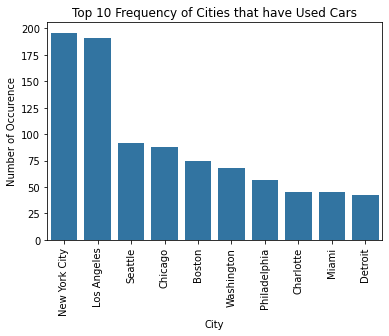

In [3]:
# Top 10 Cities with the most used car using dynamic ordering

base_color = sb.color_palette()[0]
plt.xticks(rotation=90)


sb.countplot(data=used_car, x='City', color=base_color,  order=['New York City','Los Angeles','Seattle','Chicago','Boston'
                                                                      'Washington','Philadelphia',
                                                                'Charlotte ','Miami','Detroit ']);

# Dynamic-ordering the bars
freq = used_car['City'].value_counts()[:10]

# Get the indexes of the Series
city_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of `city`
sb.countplot(data=used_car, x='City', color=base_color, order=city_order);
plt.xlabel('City');
plt.ylabel('Number of Occurence');
plt.title("Top 10 Frequency of Cities that have Used Cars");



### Most common Automobile fuel type
Diesel was the most common fuel types as well as petrol in all the region where used car were available. 


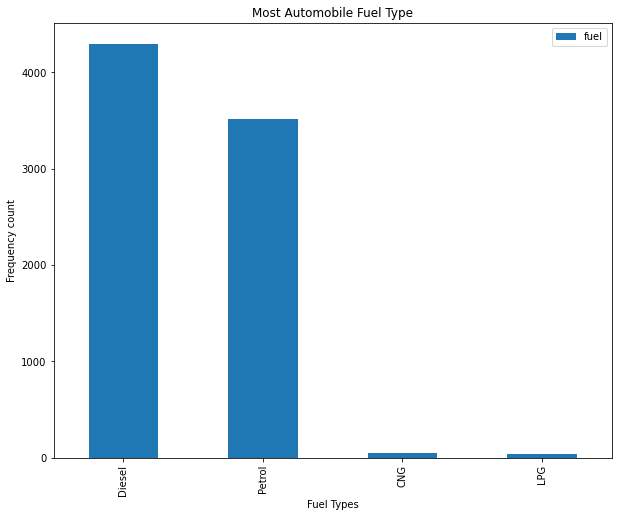

In [4]:
#Most common automobile fuel type
def automobile_fuel():
    used_car['fuel'].value_counts().to_frame().plot(kind = 'bar', 
                                                            title ="Most Automobile Fuel Type",figsize =(10,8))
    plt.xlabel('Fuel Types')
    plt.ylabel('Frequency count')
automobile_fuel()

### Most Common Car Brand
The most common top 10 used car brand was Maruti followed by Hyundai with Maruti having the largest proportion.


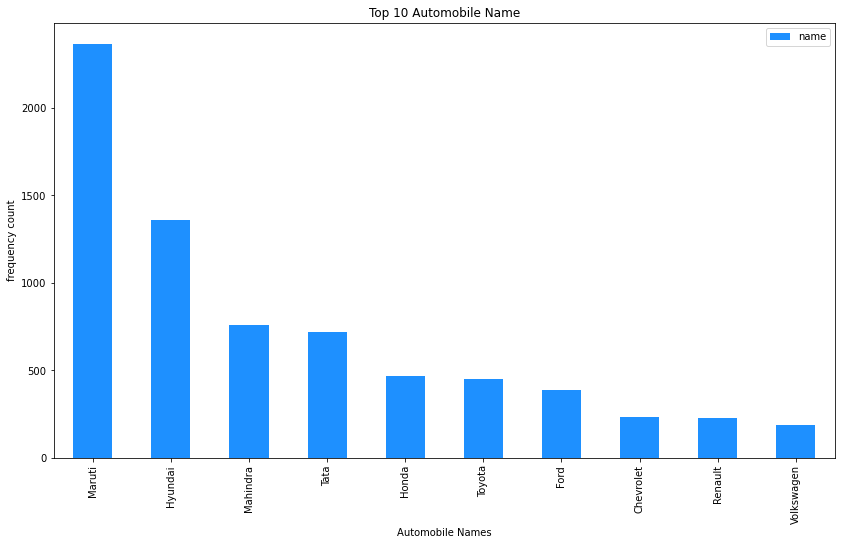

In [5]:
# Most Common Car Names
used_car['name'].value_counts().to_frame()[:10].plot(kind = 'bar', 
                                                          title = "Top 10 Automobile Name",
                                                          color= 'dodgerblue',figsize =(14,8))
plt.xlabel('Automobile Names');
plt.ylabel('frequency count');


### Most used car mileage range
Over the whole region most used cars mileage range were populated within the range of 18km-20km 

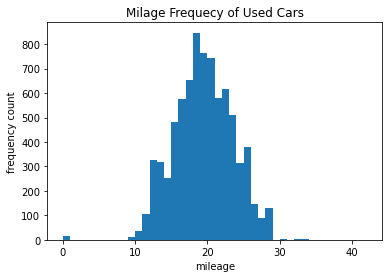

In [6]:
# most used car mileage range
def mileage_distribution():
    fig = plt.figure()
    bins = np.arange(0, used_car['mileage'].max()+1,1)
    plt.hist(data = used_car, x = 'mileage', bins = bins);
    plt.xlabel('mileage');
    plt.ylabel('frequency count');
    plt.title("Milage Frequecy of Used Cars");

mileage_distribution()

### Mileage vs Selling price
The correlation between Milage and Selling price shows that mileage are concentrated within the range of 15km-20km with a price range of about 30k-100k.

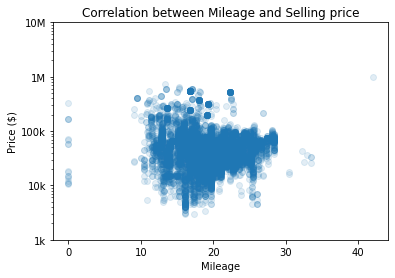

In [7]:
#Correlation between mileage and selling price
plt.scatter(data = used_car, x = 'mileage', y = 'selling_price', alpha = 1/8)
plt.xlabel('Mileage')
#plt.ylabel('Price (dollars)') 
plt.yscale('log')
plt.yticks([10e3, 10e4, 10e5, 10e6, 10e7], ['1k','10k','100k', '1M','10M'])
plt.ylabel('Price ($)')
plt.title("Correlation between Mileage and Selling price");

### Car mileage vs Region
The plot shows we have a minimum mileage of 10km across all regions while the southern region has the maximum car mileage of 30km.

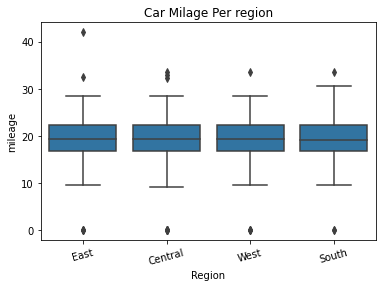

In [8]:
#Car Milage Per region
sb.boxplot(data= used_car, x='Region', y='mileage', color=base_color)
plt.xticks(rotation=15);
plt.title("Car Milage Per region");

###  Car Transmission vs Selling Price
Automatic transmission is more expensive than the Manual transmission with minimum price of automatic to be 8k while that of manual is 4k.

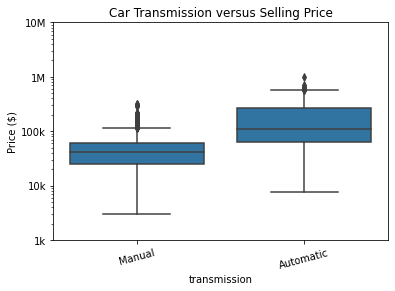

In [9]:
# Car Transmission versus Selling Price
sb.boxplot(data= used_car, x='transmission', y='selling_price', color=base_color)
plt.xticks(rotation=15);
plt.yscale('log')
plt.yticks([10e3, 10e4, 10e5, 10e6, 10e7], ['1k','10k','100k', '1M','10M'])
plt.ylabel('Price ($)')
plt.title("Car Transmission versus Selling Price");

###  Cars transmission vs Region
Across all region Manual transmission seems to be the most populated means of transmission with the central region having the highest.

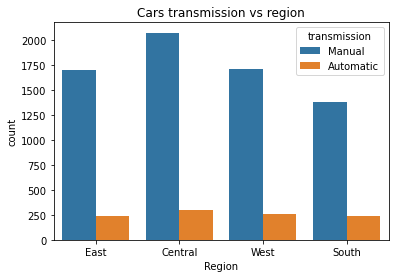

In [10]:
# state of cars transmission by region
transmission_classes = ['Manual', 'Automatic']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= transmission_classes)
used_car['transmission'] = used_car['transmission'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'transmission')
plt.title("Cars transmission vs region");


### Cars owners vs Region
From all the region most used cars sellers are First owner


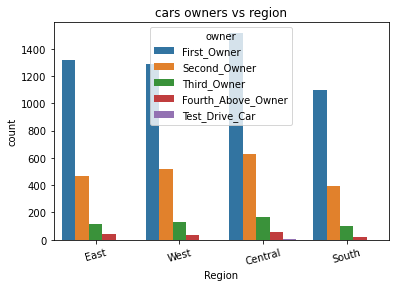

In [11]:
# state of cars owners by region
region_classes = ['East','West','Central','South']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= region_classes)
used_car['Region'] = used_car['Region'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'owner')
plt.xticks(rotation = 15);
plt.title("cars owners vs region");


### Car sellers vs Region
The plot shows from all region most delears are individual car sellers 

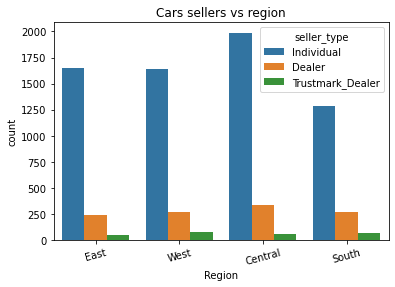

In [12]:
# state of cars sellers by region
region_classes = ['East','West','Central','South']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= region_classes)
used_car['Region'] = used_car['Region'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'seller_type')
plt.xticks(rotation = 15);
plt.title("Cars sellers vs region");

### Car sold vs Region
From all region it could be depicted that most cars are yet to be sold with the central having the highest yet to be sold vehicle

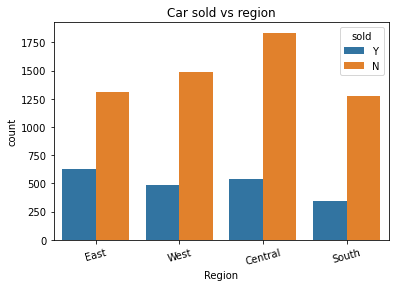

In [13]:
#Car sold by region
region_classes = ['Y','N']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= region_classes)
used_car['sold'] = used_car['sold'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'sold')
plt.xticks(rotation = 15);
plt.title("Car sold vs region");


### Sum of used cars selling price by Segregated years interval (8 Years Interval)


In [14]:
# Sum of used cars selling price by Segregated years interval
car1_century = used_car.loc[(used_car['year'] <= 2000) & (used_car['year'] >= 1994)]
car2_century = used_car.loc[(used_car['year'] <= 2008) & (used_car['year'] >= 2001)]
car3_century = used_car.loc[(used_car['year'] <= 2017) & (used_car['year'] >= 2009)]



In [15]:
car_94_00 = car1_century['selling_price'].sum()
car_01_08 = car2_century ['selling_price'].sum()
car_09_17 = car3_century ['selling_price'].sum()


### Comparing selling prices for 8 years interval
After segregating the selling prices the highest sum of selling price were from the year 2009-2017 having around 96.45%.


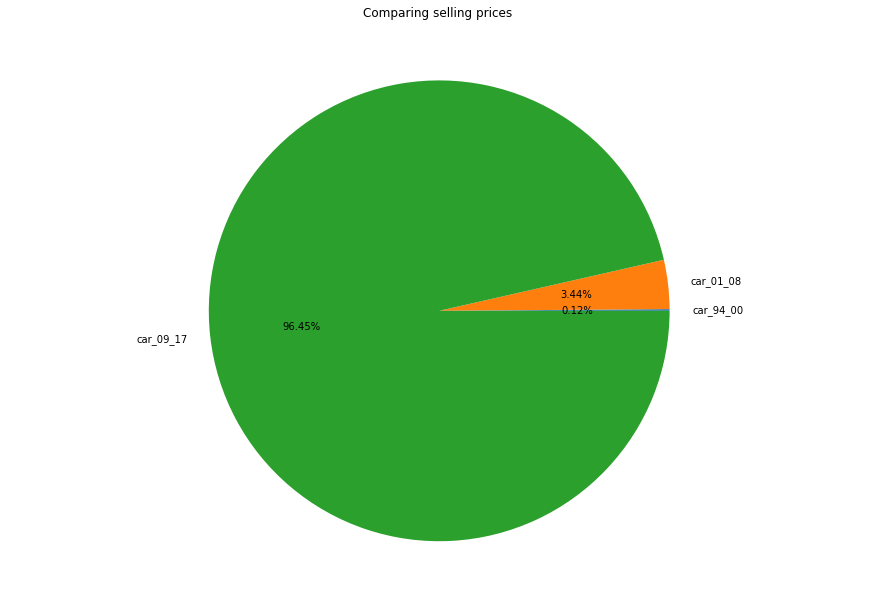

In [16]:
#Comparing selling prices 
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = ['car_94_00','car_01_08','car_09_17']
selling_price_sum = [3800913, 112204648,3147632755]
ax.pie(selling_price_sum, labels = langs,autopct='%1.2f%%')
plt.title("Comparing selling prices ");

plt.show()

###  Car engine vs Mileage vs Transmission
The relationship between the three variables shows that 20km mileage having an engine size around 1000-1500 are populated by Manual transmission.


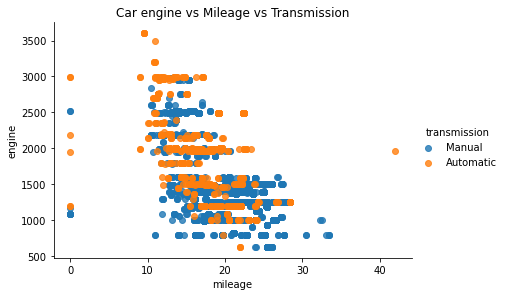

In [17]:
# Relationship between car enngine, mileage, and transmission
g = sb.FacetGrid(data = used_car, hue = 'transmission', 
                 hue_order = ['Manual','Automatic'],size= 4, aspect =1.5)
g = g.map(sb.regplot, 'mileage', 'engine', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('mileage')
plt.ylabel('engine');
plt.title("Car engine vs Mileage vs Transmission");



### Mileage vs Engine vs Max_power vs Selling_price
The correlation between the four varibales shows that max power and selling price have a strong correlation as well as engine and max power.


In [18]:
#Correlations between 'mileage','engine','max_power',and 'selling_price'
used_auto = ['mileage','engine','max_power','selling_price']

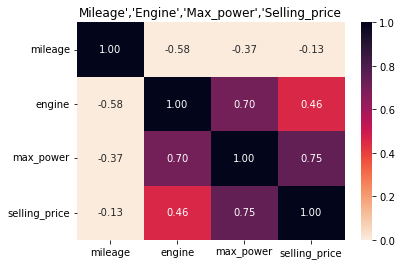

In [19]:
sb.heatmap(used_car[used_auto].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);
plt.title("Mileage','Engine','Max_power','Selling_price");


In [ ]:
!jupyter nbconvert Muaz_Hassan_Part_II_Slides.ipynb --to slides --post serve --no-input --no-prompt